In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
#sns.get_dataset_names()

In [3]:
Titan = sns.load_dataset('titanic')
Titan.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
#If is there any Null value
Titan.isnull().sum()
#Titan.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
divisions = Titan['sex']    #Titan.sex
divisions

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [6]:
#Titan.sex.shape
#len(Titan.sex)

In [7]:
#figuring out the genders
Gender = Titan["sex"].unique()
Gender

array(['male', 'female'], dtype=object)

In [8]:
# and lets see what are the embarked (the starting city) classes
Embarked = Titan["embarked"].unique()
Embarked

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
print('\nNo. of male passengers:{} & No. of female passengers: {} of total {} passengers\n'.format((Titan.sex=='male').sum(), (Titan.sex=='female').sum(),len(Titan.sex)))


No. of male passengers:577 & No. of female passengers: 314 of total 891 passengers



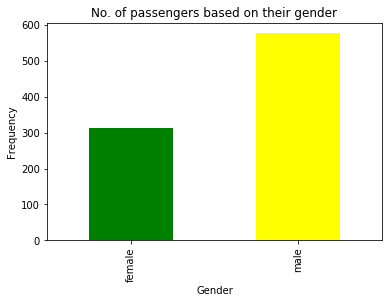

In [10]:
# or showing as a classification (bar) diagram: No. of sample per each (sex)classes
count_classes = pd.value_counts(Titan['sex'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green','yellow'])
plt.title("No. of passengers based on their gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

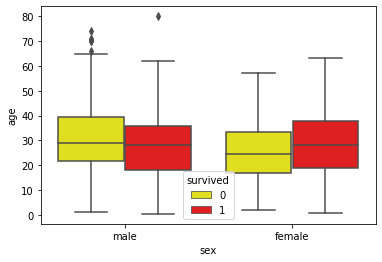

In [11]:
#age-gender distribution
sns.boxplot(x="sex", y="age", hue="survived", data=Titan, palette=['Yellow','Red'])

In [ ]:
#age-gender distribution
sns.boxplot(x="sex", y="age", hue="survived", data=Titan, palette=['Yellow','Red'])

C:\Users\behodi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\behodi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


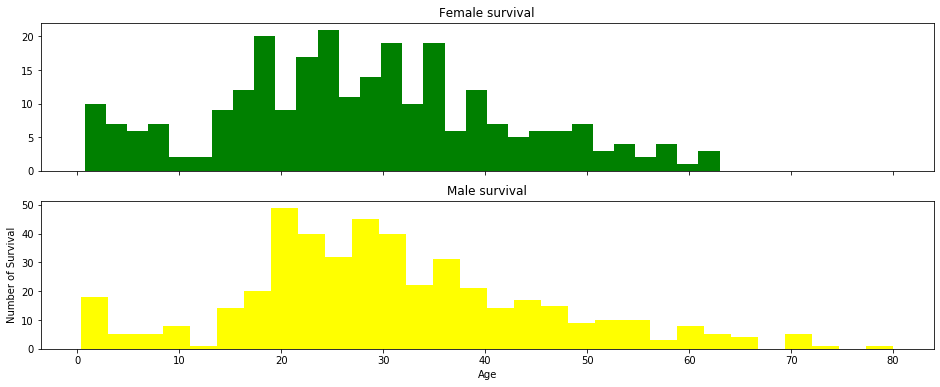

In [12]:
#age-gender distribution
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
bins = 30

ax1.hist(Titan.age[Titan.sex == 'female'], bins = bins, color='Green')
ax1.set_title('Female survival')
plt.ylabel('Number of Survival')

ax2.hist(Titan.age[Titan.sex == 'male'], bins = bins, color='Yellow')
ax2.set_title('Male survival')

plt.ylabel('Number of Survival')
plt.xlabel('Age')
plt.show()

In [13]:
(Titan.age[Titan.sex == 'male'].max(), Titan.age[Titan.sex == 'female'].max())

(80.0, 63.0)

# recollecting (categorical) Data

In [14]:
Titanic=Titan.loc[Titan.index,['survived','pclass','sex','embarked']]
Titanic.head(3)

,survived,pclass,sex,embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S


In [15]:
#to check again where the null values are sticking!
Titanic.isna().sum()

survived    0
pclass      0
sex         0
embarked    2
dtype: int64

In [16]:
#get rid of null values 
Titanic=Titan.loc[Titan.embarked.notna(), ['survived','pclass','sex','embarked']]
Titanic.head(5)

,survived,pclass,sex,embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [17]:
Titanic[Titanic.sex=='male'].describe()

,survived,pclass
count,577.000000,577.000000
mean,0.188908,2.389948
std,0.391775,0.813580
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,0.000000,3.000000
max,1.000000,3.000000


In [18]:
Titanic[Titanic.sex=='female'].describe()

,survived,pclass
count,312.000000,312.000000
mean,0.740385,2.166667
std,0.439128,0.854971
min,0.000000,1.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,3.000000
max,1.000000,3.000000


In [19]:
#recheck again
#Titanic.isna().sum()

In [20]:
#Titan.loc[(Titan['sex'] == True) & (Titan['survived'] == 1)]

Alter = Titan['age'].where(Titan['age']>30 )
Gender
Alter